In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [217]:
df=pd.read_csv('historical_emissions.csv')
df

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Nauru,CAIT,Total including LUCF,CO2,MtCO₂e,0.07,0.07,0.06,0.05,0.05,...,0.09,0.10,0.10,0.10,0.11,0.11,0.11,0.12,0.13,0.13
191,Tuvalu,CAIT,Total including LUCF,CO2,MtCO₂e,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00
192,Niue,CAIT,Total including LUCF,CO2,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
193,Fiji,CAIT,Total including LUCF,CO2,MtCO₂e,-0.65,-0.73,-0.81,-1.03,-1.24,...,-1.74,-1.76,-1.74,-1.72,-1.78,-1.79,-1.79,-1.78,-1.81,-1.81


In [218]:
df=df.drop(columns=['Data source','Sector','Gas','Unit'])
df=df.dropna()

In [102]:
df_clean=df.loc[df['Country']=='Indonesia']

In [103]:
df_clean

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
5,Indonesia,1269.55,1081.11,1068.1,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,849.42,907.96,1484.56,772.38,909.21,881.31,869.88,855.3,846.23,832.39


In [104]:
# for i in range(len(df_clean)):
row=df_clean.columns.values.tolist()
row.pop(0)
# print(row)
country=df_clean.iloc[:,0].values.tolist()
# country

In [105]:
df_trans=df_clean.T

In [106]:
new_header = df_trans.iloc[0] #grab the first row for the header
df_trans = df_trans[1:] #take the data less the header row
df_trans.columns = new_header #set the header row as the df header

In [107]:
df_trans

Country,Indonesia
2018,1269.55
2017,1081.11
2016,1068.1
2015,1574.76
2014,1539.23
2013,1250.27
2012,1303.87
2011,1285.69
2010,773.92
2009,1036.71


In [108]:
df_testing=df_trans.iloc[:10]
df_testing.head()


Country,Indonesia
2018,1269.55
2017,1081.11
2016,1068.1
2015,1574.76
2014,1539.23


In [109]:
df_training=df_trans.iloc[10:]

In [110]:
Indonesia=df_training.iloc[::-1,0].values.tolist()
Indonesia

[832.39,
 846.23,
 855.3,
 869.88,
 881.31,
 909.21,
 772.38,
 1484.56,
 907.96,
 849.42,
 795.62,
 631.16,
 1001.39,
 761.93,
 1031.49,
 829.93,
 1152.83,
 738.57,
 731.76]

In [111]:
def splitSequence(seq, n_steps):
    
    #deklarasi list kosong X dan y
    X = []
    y = []
    
    for i in range(len(seq)):
        #Index terakhir sebagai label
        lastIndex = i + n_steps
        
        #jika lastIndex > panjang sekuens, break
        if lastIndex > len(seq) - 1:
            break
            
        #buat sekuens input dan output
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y 
    
    pass

In [112]:
n_steps = 5
X, y = splitSequence(Indonesia, n_steps = 5)

In [113]:
print(X)

[[ 832.39  846.23  855.3   869.88  881.31]
 [ 846.23  855.3   869.88  881.31  909.21]
 [ 855.3   869.88  881.31  909.21  772.38]
 [ 869.88  881.31  909.21  772.38 1484.56]
 [ 881.31  909.21  772.38 1484.56  907.96]
 [ 909.21  772.38 1484.56  907.96  849.42]
 [ 772.38 1484.56  907.96  849.42  795.62]
 [1484.56  907.96  849.42  795.62  631.16]
 [ 907.96  849.42  795.62  631.16 1001.39]
 [ 849.42  795.62  631.16 1001.39  761.93]
 [ 795.62  631.16 1001.39  761.93 1031.49]
 [ 631.16 1001.39  761.93 1031.49  829.93]
 [1001.39  761.93 1031.49  829.93 1152.83]
 [ 761.93 1031.49  829.93 1152.83  738.57]]


In [114]:
for i in range(len(X)):
    print(X[i], y[i])

[832.39 846.23 855.3  869.88 881.31] 909.21
[846.23 855.3  869.88 881.31 909.21] 772.38
[855.3  869.88 881.31 909.21 772.38] 1484.56
[ 869.88  881.31  909.21  772.38 1484.56] 907.96
[ 881.31  909.21  772.38 1484.56  907.96] 849.42
[ 909.21  772.38 1484.56  907.96  849.42] 795.62
[ 772.38 1484.56  907.96  849.42  795.62] 631.16
[1484.56  907.96  849.42  795.62  631.16] 1001.39
[ 907.96  849.42  795.62  631.16 1001.39] 761.93
[ 849.42  795.62  631.16 1001.39  761.93] 1031.49
[ 795.62  631.16 1001.39  761.93 1031.49] 829.93
[ 631.16 1001.39  761.93 1031.49  829.93] 1152.83
[1001.39  761.93 1031.49  829.93 1152.83] 738.57
[ 761.93 1031.49  829.93 1152.83  738.57] 731.76


In [115]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X[:2])

[[[832.39]
  [846.23]
  [855.3 ]
  [869.88]
  [881.31]]

 [[846.23]
  [855.3 ]
  [869.88]
  [881.31]
  [909.21]]]


In [116]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))

In [117]:
model.layers

In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['accuracy'])

In [120]:
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 890ms/step - loss: 4.7876 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2.3865 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1.6556 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.7477 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2690 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1284 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy

In [121]:
print(df_testing.iloc[::-1,0].values.tolist())

[1036.71, 773.92, 1285.69, 1303.87, 1250.27, 1539.23, 1574.76, 1068.1, 1081.11, 1269.55]


In [189]:
X_test, y_test = splitSequence(df_testing.iloc[::-1,0].values.tolist(), n_steps = 5)

In [123]:
X_test

array([[1036.71,  773.92, 1285.69, 1303.87, 1250.27],
       [ 773.92, 1285.69, 1303.87, 1250.27, 1539.23],
       [1285.69, 1303.87, 1250.27, 1539.23, 1574.76],
       [1303.87, 1250.27, 1539.23, 1574.76, 1068.1 ],
       [1250.27, 1539.23, 1574.76, 1068.1 , 1081.11]])

In [190]:
y_test

array([1539.23, 1574.76, 1068.1 , 1081.11, 1269.55])

In [125]:
predictNextNumber = model.predict(X_test, verbose=1)
print(predictNextNumber)

1/1 [==============================] - 0s 113ms/step
[[1219.5288]
 [1229.3632]
 [1569.2052]
 [1468.1232]
 [1121.7599]]


In [157]:
print(df_testing.iloc[4::-1,0].values.tolist())
input = df_testing.iloc[5::-1,0].values.tolist()
last_6_year = df_testing.iloc[5::-1,0].values.tolist()
last_5_year = df_testing.iloc[4::-1,0].values.tolist()

[1539.23, 1574.76, 1068.1, 1081.11, 1269.55]


In [158]:
tenYear=[]
for i in range(0,10):
    test_data = np.array(last_5_year)
    test_data = test_data.reshape((1, n_steps, n_features))
    predictNextNumber = model.predict(test_data, verbose=1)
    tenYear.append(predictNextNumber[0][0])
    last_5_year.pop(0)
    last_5_year.append(predictNextNumber[0][0])
print(tenYear)

1/1 [==============================] - 0s 12ms/step
[965.66895, 1403.2396, 1028.1616, 1140.2489, 991.38525, 1036.6229, 1090.7692, 1074.0704, 1191.4464, 1162.6127]


In [160]:
tahun=['2019','2020','2021','2022','2023','2024','2025','2026','2027','2028']


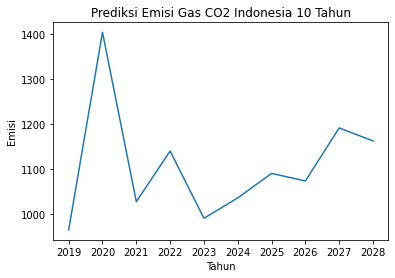

In [161]:
plt.plot(tahun, tenYear)
plt.title('Prediksi Emisi Gas CO2 Indonesia 10 Tahun')
plt.xlabel('Tahun')
plt.ylabel('Emisi')
plt.show()